# #Assignment 1

In [4]:
pip install tensorflow



   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/376.0 MB 8.5 MB/s eta 0:00:45
   ---------------------------------------- 2.1/376.0 MB 6.2 MB/s eta 0:01:01
   ---------------------------------------- 3.1/376.0 MB 6.0 MB/s eta 0:01:03
   ---------------------------------------- 4.2/376.0 MB 5.9 MB/s eta 0:01:04
    --------------------------------------- 5.5/376.0 MB 5.7 MB/s eta 0:01:06
    --------------------------------------- 6.3/376.0 MB 5.4 MB/s eta 0:01:08
    --------------------------------------- 7.3/376.0 MB 5.5 MB/s eta 0:01:08
    --------------------------------------- 8.7/376.0 MB 5.5 MB/s eta 0:01:08
   - -------------------------------------- 10.0/376.0 MB 5.5 MB/s eta 0:01:07
   - -------------------------------------- 11.0/376.0 MB 5.5 MB/s eta 0:01:07
   - -------------------------------------- 12.3/376.0 MB 5.5 MB/s eta 0:01:06
   - -------------------------------------- 12.6/376.0 MB 5.5 MB/s 

In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('HousingData.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [10]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [12]:
data = data.dropna()

<Axes: >

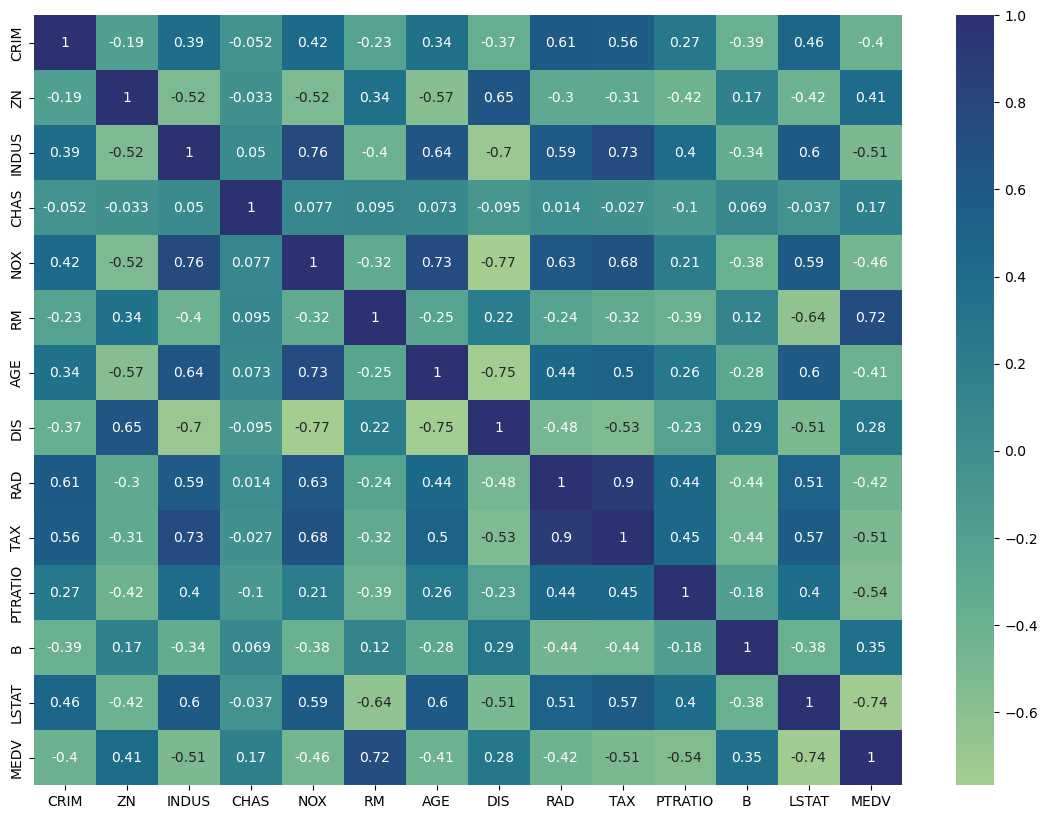

In [14]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), cmap='crest', annot=True)

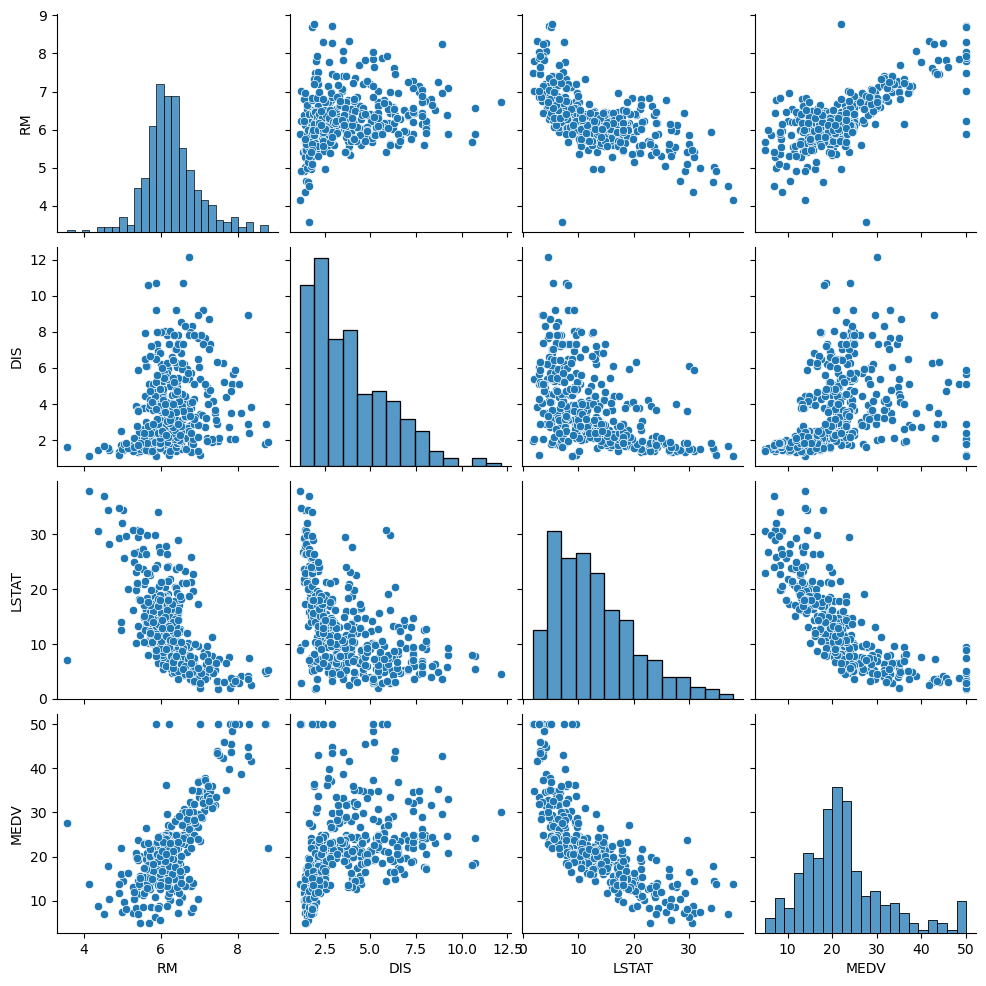

In [16]:
sns.pairplot(data[['RM', 'DIS', 'LSTAT', 'MEDV']])

In [18]:
X = data[['RM', 'DIS', 'LSTAT']]
y = data['MEDV']

In [20]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [22]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(3,)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, restore_best_weights=True)

In [28]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.fit(train_x_scaled, train_y, validation_data=(test_x_scaled, test_y), epochs=100, callbacks=[early_stopping])

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 617.7607 - mse: 617.7607 - val_loss: 500.8116 - val_mse: 500.8116
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 639.0775 - mse: 639.0775 - val_loss: 476.3434 - val_mse: 476.3434
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 524.4562 - mse: 524.4562 - val_loss: 429.0960 - val_mse: 429.0960
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 499.0744 - mse: 499.0744 - val_loss: 346.4570 - val_mse: 346.4570
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 361.6478 - mse: 361.6478 - val_loss: 224.4391 - val_mse: 224.4391
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 242.2245 - mse: 242.2245 - val_loss: 98.8046 - val_mse: 98.8046
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 105.2779 - mse: 105.2779 - val_loss: 52.4148 - val_mse: 52.4148
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 65.7464 - mse: 65.7464 - val_loss: 42.8818 - val_mse: 42.8818


In [30]:
model.evaluate(test_x_scaled, test_y)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.2806 - mse: 14.2806


[12.386382102966309, 12.386382102966309]